#### Implementación Lumped Parameter Model for adsorption, Xiao et al. (2013)

Contribuidores:
* Kieran Conradie
* Carlos Ullrich
* Felipe Huerta
* Felipe Díaz

In [1]:
# Integración numérica de sistemas de ecuaciones diferenciales ordinarias
from scipy.integrate import solve_ivp

# Minimización de funciones objetivos para ajuste de parámetros
from scipy.optimize import least_squares

# Ecuaciones no lineales
from scipy.optimize import fsolve

# Computación científica
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
# Copiar variables creando nuevos objetos
import copy

# Procesamiento de datos
# Importar pandas para cargar datos desde archivos .csv y otros
import pandas as pd
# CSV puro y duro
import csv

# Funciones creadas anteriormente
import lpm_functions as f

Las funciones p_eqn, adsorcion_hidrogeno y resolver_modelo se movieron al archivo lpm_functions.py y se importan en la celda anterior

#### Parametros, condiciones y solve_ivp

Parámetros asociados a la mezcla

In [2]:
# Propiedades termofísicas

# Calores especificos

c_p = 10167 # Calor especifico del hidrogeno (J kg-1 K-1)


# K: Originalmente estaba dado en J, por eso el /1000
# F: Sugerencia: ocupar unidades SI lo más posible

# Constantes 
R = 8.314 # J mol-1 K-1
alpha = 3080 # Factor entalpico (J mol-1)
beta = 18.9 # Factor entropico (J mol-1 K-1)
epsilon_b = 0.49 
b = 2

Equilibrio de adsorción

In [3]:
# Otros
p_0 = 1470 * 1e6 # Presion de saturacion (Pa)
n_0 = 71.6 # Cantidad limite de adsorcion (mol kg-1)

Parámetros asociados al tanque

In [4]:
# PARAMETROS

# Dimensiones estanque
# V = 0.00015 # Volumen de estanque (m^3)    # No se si es volumen interno
# l = 0.133 # m, alto del tanque

V = 6.365 # Volumen tanque (m^3)  Obtenido de Linde
d = 1.608 # Diametro tanque (m)   Obtenido de Linde
l = 4*V/(np.pi*(d**2)) # altura estque (m)
A_e = 2*np.pi*l # Área superficial estanque m^2  # considere manto cilindro superficial (no contamos "tapas")

print(l)

# Masas (TENGO QUE CAMBIARLAS)
# m_s = 0.671 # masa carbón activado (kg)    # datos del carbono, considerar que está lleno a un 30%.
# m_w = 3.714 # Masa paredes de acero (kg)   # datos del carbono

m_s = (0.3*V)*107.9 # Masa carbón activado (kg/m^3) [tanque lleno al 30%]
m_w = 4910 # Masa tanque (kg)
M_H2 = 2.0159E-3 # Masa molar del hidrogeno (kg mol-1)

c_s = 825 # Calor especifico del carbón activado (J kg-1 K-1)     # datos del carbono
c_w = 500 # Calor especifico paredes de acero (J kg-1 K-1)    # este es a 20°C segun internet


# CONDICIONES INICIALES
p_ci = np.array([1.01235, 1.01235, 1.01235])*1e5 #Pa
T_ci = np.array([283, 283, 273]) #K 

# Temperatura del refrigerante
T_cf = np.array([282.5, 284.5, 282.2]) #K

# Coeficiente de transferencia de calor
# Calculado en Jupyter Notebook separado
h_cf = np.array([3.6, 3.6, 3.6]) # W m^-2 K^-1

# Flujos másicos referenciales (TENGO QUE CAMBIARLO)
# Flujos de carga típicos 50 cm^3 / min
# m_cdot = np.array([3.46e-4, 3.46e-4, 3.46e-4])       # kg s-1
m_cdot = np.array([0.021, 0.021, 0.021])

# Lista de tiempos: Inicial, fin carga, inicio descarga
t_c0 =  np.array([0, 0, 0])           # s
t_cf = np.array([1042, 422, 175])          # s   # falta realizar exp
t_cd = np.array([3189, 2622, 2382])          # s   # falta realizar exp

# Entalpías de entrada y salida
h_in = np.array([3986.8, 4001.1, 3987.2])  # J/kg  # no alcance a buscar tablas
h_out = np.array([3718.8, 3752.6, 3719.3]) # J/kg  # no alcance a buscar tablas

3.134270230872731


In [5]:
# Presión de la alimentación
p_a = 1e5
R = 8.314 
T_alimentación = 298.15 # 25°C

# pv = nRT
# p = (n/v) * R * T
# rho = p/RT # mol/m^3
# rho = p/RT * 0.002 kg / mol

rho = p_a/(R*T_alimentación) * 0.002
print("rho %.3e kg/(m^3)" % rho)

rho 8.068e-02 kg/(m^3)


In [6]:
rho_cgs = rho * 1e3 /(1e6)

$\rho = 2.82 mg/cm$^3$

In [7]:
F = 50 / 60 #cm^3 / s

# flujo másico en mg/s
mdot_cgs = rho_cgs * F

mdot_final = mdot_cgs/1e6

print("mdot_final = %.3e kg/s" % mdot_final )

mdot_final = 6.724e-11 kg/s


#### Implementación del modelo

La función resolver_modelo se movió al archivo lpm_functions.py

In [8]:
parametros_1 = np.array([p_ci, T_ci, T_cf, h_cf, m_cdot, t_c0, t_cf, t_cd, h_in, h_out])
parametros_2 = np.array([c_p, R, alpha, beta, epsilon_b, b, p_0, n_0, V, l, A_e, m_s, m_w, M_H2, c_s, c_w])

t_result, m_t_result, T_result, p_i = f.resolver_modelo(0, parametros_1, parametros_2)


dmdt 0.021
dTdt [0.0329511]
dmdt 0.021
dTdt [0.03290444]
dmdt 0.021
dTdt [0.0329511]
dmdt 0.021
dTdt [0.0329511]
dmdt 0.021
dTdt [0.0329511]
dmdt 0.021
dTdt [0.03294762]
dmdt 0.021
dTdt [0.03294762]
dmdt 0.021
dTdt [0.03294414]
dmdt 0.021
dTdt [0.03294414]
dmdt 0.021
dTdt [0.03290959]
dmdt 0.021
dTdt [0.03290959]
dmdt 0.021
dTdt [0.03287539]
dmdt 0.021
dTdt [0.03287539]
dmdt 0.021
dTdt [0.03255142]
dmdt 0.021
dTdt [0.03255142]
dmdt 0.021
dTdt [0.03225612]
dmdt 0.021
dTdt [0.03225612]
dmdt 0.021
dTdt [0.03020354]
dmdt 0.021
dTdt [0.03020364]
dmdt 0.021
dTdt [0.02892982]
dmdt 0.021
dTdt [0.02892992]
dmdt 0.021
dTdt [0.02495363]
dmdt 0.021
dTdt [0.02495693]
dmdt 0.021
dTdt [0.02303103]
dmdt 0.021
dTdt [0.02303343]
dmdt 0.021
dTdt [0.02053196]
dmdt 0.021
dTdt [0.020527]
dmdt 0.021
dTdt [0.01888427]
dmdt 0.021
dTdt [0.01888124]
dmdt 0.021
dTdt [0.01762614]
dmdt 0.021
dTdt [0.01762435]
dmdt 0.021
dTdt [0.01643739]
dmdt 0.021
dTdt [0.01643592]


#### Gráfico Temperatura

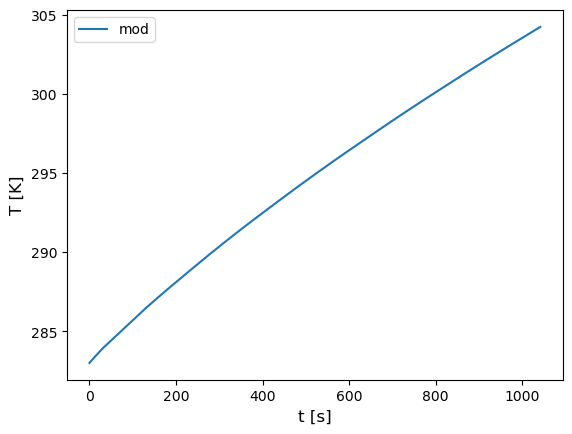

In [9]:
# Temperatura
plt.plot(t_result, T_result, label='mod')
### Validación experimental: ocupando datos previamente cargados y definidos para carga

# Graficamos los experimentos
#plt.plot(t_exp_T_c, T_exp_c, label='exp', marker ='o', ls='', color='k')

# Estética
plt.xlabel('t [s]', size = 12)
plt.ylabel('T [K]', size = 12)

# Visualización
plt.legend()
plt.show()

#### Cálculo Presión

In [10]:
# Como calculamos P, m_a y m_g?
p = []

for i in range(len(T_result)):
    # Se encuentra el valor de la presión mediante la función fsolve   (agregué m_t_result[i], porque m_t[i] no está definido)
    p_inst = fsolve(f.p_eqn, p_i, args = (n_0, R, T_result[i], alpha, beta, b, p_0, M_H2, m_s, V, epsilon_b, m_t_result[i]))
    # Se extrae el valor en el indice 0 porque p_inst es de la forma [float]
    # Se divide en 1e6 para pasar de Pa a MPa
    p_inst = p_inst[0]
    
    if i % 100000 == 0:
        print(f'En el indice [{i}] la presión es: {p_inst} Pa')

    p.append(p_inst)

p = np.array(p)
print(p[-1])

En el indice [0] la presión es: 93566.39239792501 Pa
7671438.085198521


#### Gráfico Presión

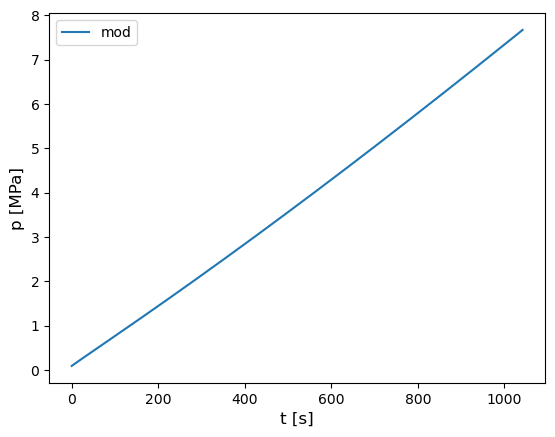

In [11]:
# Presión
plt.plot(t_result, p/1e6, label='mod')


### Validación experimental: ocupando datos previamente cargados y definidos para carga

# Graficamos los experimentos
#plt.plot(t_exp_p_c, p_exp_c, label='exp', marker ='o', ls='', color='k')

# Estética
plt.xlabel('t [s]', size = 12)
plt.ylabel('p [MPa]', size = 12)

# Visualización
plt.legend()
plt.show()

#### Gráfico masa fase adsorbida y fase gaseosa

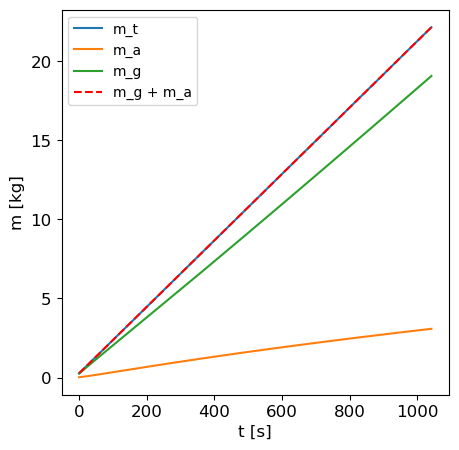

In [12]:
# Calcular los valores de masa y gas
n_a = n_0*np.exp(-((R*T_result)/(alpha+beta*T_result))**b * np.log(p_0/p)**b)
m_a = n_a*M_H2*m_s
m_a = np.array(m_a)
m_g = M_H2*p*(V*epsilon_b)/(R*T_result) 

# Graficar las líneas
plt.figure(figsize=[5, 5])
plt.plot(t_result, m_t_result, label='m_t')
plt.plot(t_result, m_a, label='m_a')
plt.plot(t_result, m_g, label='m_g')
plt.plot(t_result, m_g + m_a, "r--", label='m_g + m_a')

# Agregar leyendas al gráfico
plt.legend()

# Agrandar el tamaño de los números en el gráfico
plt.tick_params(labelsize=12)
plt.xlabel('t [s]', size=12)
plt.ylabel('m [kg]', size=12)

# Mostrar el gráfico
plt.show()